<a href="https://colab.research.google.com/github/lsmith01t/PROJECT_2/blob/main/Project2v1_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, \
precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay, \
classification_report
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [5]:
df_1 = pd.read_csv('adult.csv')
df_1_ml = df_1.copy()

In [6]:
def eval_classification(true, pred, name='Model'):
  """shows classification_report and confusion matrix
  for the model predictions"""
  
  print(name, '\n')
  print(classification_report(true, pred))
  ConfusionMatrixDisplay.from_predictions(true, pred)
  plt.show()

  scores = pd.DataFrame()
  scores['Model Name'] = [name]
  scores['Precision'] = [precision_score(true, pred)]
  scores['Recall'] = [recall_score(true, pred)]
  scores['F1 Score'] = [f1_score(true, pred)]
  scores['Accuracy'] = [accuracy_score(true, pred)]

  return scores

#Data Set 1 Adult Income Dataset

## 1.This data was obtained from Kaggles website. 
The data source can be located here: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

Acknowledgements:
This dataset named “adult” is found in the UCI machine learning repository
http://www.cs.toronto.edu/~delve/data/adult/desc.html

##2.The target of my project will be to predict if the income of each person is in one of two classes. Greater than 50K or not.  
 

In [7]:
df_1_ml.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [8]:

df_1_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
#This will allow me to identify if there are duplicate values in the data. I can see that there are 52
print(df_1_ml.duplicated().value_counts())


False    48790
True        52
dtype: int64


In [82]:
#look at the values of all objects to see if necessary to adjust. 
for o in df_1_ml.select_dtypes(object):
  print(o)
  print(df_1_ml[o].value_counts())
  print('\n')

age
distinguished    34327
young            14515
Name: age, dtype: int64


workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64


occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Arme

In [11]:
df_1_ml.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

Upon review of the unique fields I see opportunities to drop columns that will not aid in the prediction of the class.

The best candidate to eliminate will be "fnlwgt', this factor does not add predictive value and substantially increases the feature complication. 

I also believe the captial gain and capital loss columns can be removed. 

It appears the education and educational num are associated with each other and therefore I can eliminate education for the the classification exercise. 

Age presents an opportunity to bin ages into 4 or 5 groups. 

In [12]:
df_1_ml['age'] = df_1_ml['age'].apply(lambda x: 'young' if x < 30 else 'distinguished')

In [13]:
df_1_ml['income'] = df_1_ml['income'].replace('<=50K', 0)
df_1_ml['income'] = df_1_ml['income'].replace('>50K', 1)

df_1_ml['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [78]:
df_1_ml.drop(columns=['fnlwgt', 'capital-gain', 'capital-loss', 'education'], inplace=True)
df_1_ml.info()

KeyError: ignored

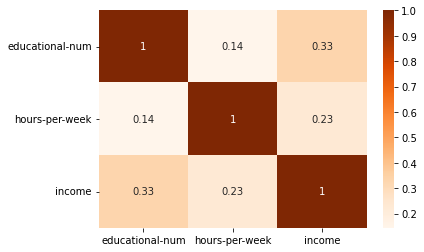

In [60]:
sns.heatmap(df_1_ml.corr(), cmap='Oranges', annot=True);

In [83]:
df_1_ml.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  object
 1   workclass        48842 non-null  object
 2   educational-num  48842 non-null  int64 
 3   marital-status   48842 non-null  object
 4   occupation       48842 non-null  object
 5   relationship     48842 non-null  object
 6   race             48842 non-null  object
 7   gender           48842 non-null  object
 8   hours-per-week   48842 non-null  int64 
 9   native-country   48842 non-null  object
 10  income           48842 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 4.1+ MB


In [102]:
#hours per week per occupation
hours_o = df_1_ml.groupby('occupation')['hours-per-week'].mean().sort_values(ascending=False)
#hours per week per race
hours_r = df_1_ml.groupby('race')['hours-per-week'].mean().sort_values(ascending=False)

#hours per week per geneder
hours_g = df_1_ml.groupby('gender')['hours-per-week'].mean().sort_values(ascending=False)

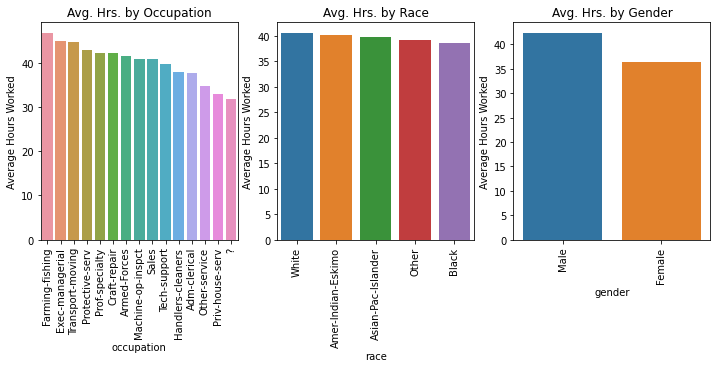

In [112]:
plt.figure(figsize=(12,4))




plt.subplot(1, 3, 1);
sns.barplot(x=hours_o.index, y=hours_o.values);
plt.xticks(rotation=90);
plt.ylabel('Average Hours Worked');
plt.title('Avg. Hrs. by Occupation');

plt.subplot(1,3, 2);
sns.barplot(x=hours_r.index, y=hours_r.values);
plt.xticks(rotation=90);
plt.ylabel('Average Hours Worked');
plt.title('Avg. Hrs. by Race');

plt.subplot(1,3,3);
sns.barplot(x=hours_g.index, y=hours_g.values);
plt.xticks(rotation=90);
plt.ylabel('Average Hours Worked');
plt.title('Avg. Hrs. by Gender');

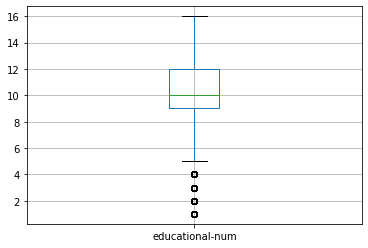

In [15]:
df_1_ml.boxplot(column = 'educational-num');


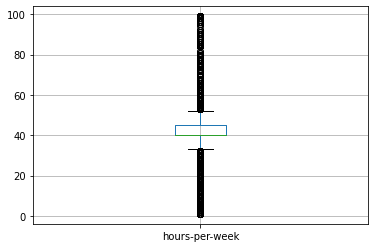

In [16]:
df_1_ml.boxplot(column = 'hours-per-week');

In [17]:
y = df_1_ml['income']
X = df_1_ml.drop(columns= 'income')

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)


In [18]:

cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
scaler = StandardScaler()
pca = PCA(n_components=2)
knn = KNeighborsClassifier()


num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)

processor = make_column_transformer(num_tuple,cat_tuple)


knn_pipe = make_pipeline(processor, knn)
knn_pca_pipe = make_pipeline(processor, pca, knn)



##KNN Model

In [25]:
%%time
knn_pipe.fit(X_train, y_train)


CPU times: user 102 ms, sys: 2.63 ms, total: 104 ms
Wall time: 107 ms


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5ae91ad940>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5ae97a5d00>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [20]:
%%time
knn_pca_pipe.fit(X_train, y_train)

CPU times: user 609 ms, sys: 530 ms, total: 1.14 s
Wall time: 681 ms


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5ae91ad940>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5ae97a5d00>)])),
                ('pca', PCA(n_components=2)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [26]:
%%time
knn_pred_train = knn_pipe.predict(X_train)
knn_pred_test = knn_pipe.predict(X_test)

CPU times: user 53.8 s, sys: 4.24 s, total: 58 s
Wall time: 48.1 s


In [22]:
%%time
knn_pca_pred_train = knn_pca_pipe.predict(X_train)
knn_pca_pred_test = knn_pca_pipe.predict(X_test)


CPU times: user 1.59 s, sys: 274 ms, total: 1.86 s
Wall time: 1.6 s


KNN Train 

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     27801
           1       0.71      0.65      0.68      8830

    accuracy                           0.85     36631
   macro avg       0.80      0.78      0.79     36631
weighted avg       0.85      0.85      0.85     36631



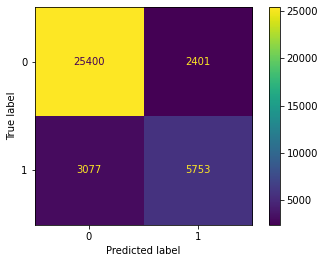

In [27]:
knn_train_scores = eval_classification(y_train, knn_pred_train, name='KNN Train')

KNN Test 

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      9354
           1       0.63      0.59      0.61      2857

    accuracy                           0.82     12211
   macro avg       0.76      0.74      0.75     12211
weighted avg       0.82      0.82      0.82     12211



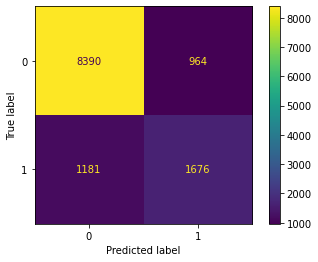

In [28]:
knn_test_scores = eval_classification(y_test, knn_pred_test, name = 'KNN Test')

KNN w-PCA Train 

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     27801
           1       0.70      0.60      0.65      8830

    accuracy                           0.84     36631
   macro avg       0.79      0.76      0.77     36631
weighted avg       0.84      0.84      0.84     36631



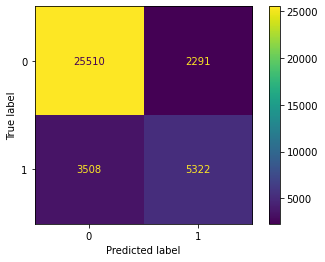

In [29]:
knn_pca_train_scores = eval_classification(y_train, knn_pca_pred_train, name='KNN w-PCA Train')

KNN w-PCA Test 

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      9354
           1       0.62      0.53      0.57      2857

    accuracy                           0.81     12211
   macro avg       0.74      0.71      0.73     12211
weighted avg       0.81      0.81      0.81     12211



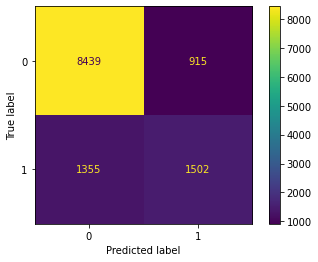

In [30]:
knn_pca_test_scores = eval_classification(y_test, knn_pca_pred_test, name = 'KNN w-PCA Test')

Upon review of the KNN Model before and after PCA it appears that PCA engineering can have an effect on the overall accuracy of the model. For test scores a 6% increase was observed. It is noted that precision, recall, and F1 were all down for class 0 but substantially up for class 1. The overall goal of the exercise was to predict which category the target would fall into and there is no known cost associated with Type 1 or Type 2 errors. Therefore PCA would be a useful process to add to the modeling outcome. 

In [31]:
neighbors = list(range(1,10))

df_scores = pd.DataFrame(index=neighbors, columns=['Test Score', 'Train Score'])

for n in neighbors:
  loop_knn = KNeighborsClassifier(n_neighbors=n)
  loop_pipe = make_pipeline(processor, loop_knn)
  loop_pipe.fit(X_train, y_train)
  train_score = loop_pipe.score(X_train, y_train)
  test_score = loop_pipe.score(X_test, y_test)
  df_scores.loc[n, 'Train Score'] = train_score
  df_scores.loc[n, 'Test Score'] = test_score

In [32]:
print(df_scores)

  Test Score Train Score
1   0.789534    0.879037
2   0.810089    0.844285
3   0.815167    0.857989
4   0.823028    0.850427
5   0.824339    0.850455
6    0.82524    0.846578
7   0.828597    0.848216
8     0.8313    0.847261
9   0.833838    0.847069


In [33]:
knn_ht = KNeighborsClassifier(n_neighbors=9)
knn_pca_pipe_ht = make_pipeline(processor, pca, knn_ht)


In [34]:
%%time
knn_pca_pipe_ht.fit(X_train, y_train)

CPU times: user 623 ms, sys: 383 ms, total: 1.01 s
Wall time: 602 ms


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5ae91ad940>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5ae97a5d00>)])),
                ('pca', PCA(n_components=2)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=9))])

In [35]:
%%time
knn_pca_pred__ht_train = knn_pca_pipe_ht.predict(X_train)
knn_pca_pred_ht_test = knn_pca_pipe_ht.predict(X_test)


CPU times: user 1.6 s, sys: 253 ms, total: 1.86 s
Wall time: 1.6 s


KNN w-PCA hyper-tuned Train 

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     27801
           1       0.70      0.55      0.61      8830

    accuracy                           0.83     36631
   macro avg       0.78      0.74      0.75     36631
weighted avg       0.82      0.83      0.83     36631



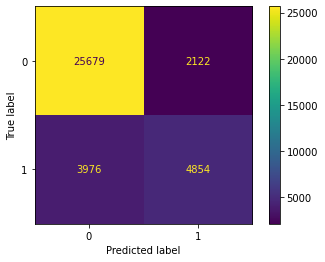

In [36]:
knn_pca__ht_train_scores = eval_classification(y_train, knn_pca_pred__ht_train, name='KNN w-PCA hyper-tuned Train')

KNN w-PCA and hyper-tuned Test 

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      9354
           1       0.64      0.50      0.56      2857

    accuracy                           0.82     12211
   macro avg       0.75      0.71      0.72     12211
weighted avg       0.81      0.82      0.81     12211



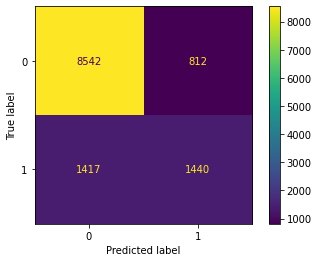

In [37]:
knn_pca__ht_test_scores = eval_classification(y_test, knn_pca_pred_ht_test, name = 'KNN w-PCA and hyper-tuned Test')

After hyper tunig the KNN model it was observed that the test accurace only increased by 1%. It is noteable that the training accurace actually decreased after hyper-tuning in the PCA version of the model. Despite the training output I would recommend to retain the hypertuning to further increase accuracy in the model. 

##Gradient Boosting Model 

In [46]:
gbc = GradientBoostingClassifier()
gbc_pipe = make_pipeline(processor, gbc)

In [47]:
gbc_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5ae91ad940>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5ae97a5d00>)])),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [45]:
print('Training', gbc_pipe.score(X_train, y_train))
print('Testing', gbc_pipe.score(X_test, y_test))

Training 0.8179410881493817
Testing 0.8234378838751945


##XG Boosting Model

In [49]:
xgb = XGBClassifier()
xgb_pipe = make_pipeline(processor, xgb)
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5ae91ad940>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5ae97a5d00>)])),
                ('xgbclassifier', XGBClassifier())])

In [51]:
print('XGBOOSTING Training accuracy:', xgb_pipe.score(X_train, y_train))
print('XGBOOSTING Testing accuracy:', xgb_pipe.score(X_test, y_test))

XGBOOSTING Training accuracy: 0.8375692719281483
XGBOOSTING Testing accuracy: 0.8457128818278601


In [53]:
xgb_pred = xgb_pipe.predict(X_train)
xgb_pred_test = xgb_pipe.predict(X_test)

XGB training 

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     27801
           1       0.71      0.54      0.62      8830

    accuracy                           0.84     36631
   macro avg       0.79      0.74      0.76     36631
weighted avg       0.83      0.84      0.83     36631



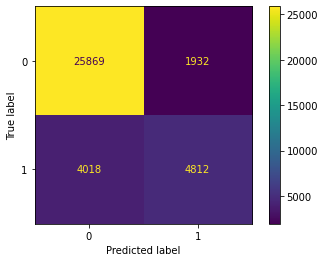

In [54]:
xgb__training_scores = eval_classification(y_train, xgb_pred, name = 'XGB training')

XGB testing 

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      9354
           1       0.72      0.55      0.63      2857

    accuracy                           0.85     12211
   macro avg       0.80      0.74      0.76     12211
weighted avg       0.84      0.85      0.84     12211



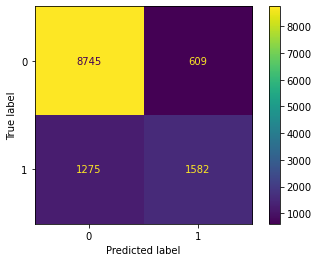

In [56]:
xgb__testing_scores = eval_classification(y_test, xgb_pred_test, name = 'XGB testing')